In [260]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import imblearn
from imblearn.over_sampling import SMOTE, ADASYN

In [658]:
# np.random.choice(np.arange(0,2),p=[0.92,0.08])

In [681]:
# reading the data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# getting their shapes
print("Shape of train :", train.shape)
print("Shape of test :", test.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [682]:
train.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won              False
avg_training_score      False
is_promoted             False
dtype: bool

Columns having Nan values:
    1. education
    2. previous_year_rating

Metrics in imputing Nan values for education:
    1. department
    2. region
    3. recruitment_channel
    4. is_promoted
    5. gender

In [683]:
train[train.length_of_service==1]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


In [684]:
# missing value treatment

for dept in train['department'].unique():
    for region in train['region'].unique():
        for gender in train['gender'].unique():
            # for pro in train['is_promoted'].unique():
                # for rec in train['recruitment_channel'].unique():
                try:
                    df_slice = train[train['department']==dept][train['region']==region][train['gender']==gender]

                    null_indexes = list(df_slice[df_slice['education'].isna()==True].index)
                    mode_value = df_slice[df_slice['education'].isna()==False]['education'].mode()[0]
                    
                    print (dept, region, gender, mode_value)
                    
                    for i in null_indexes:
                        train['education'].iloc[i] = mode_value
                    
                    
                except:
                    pass

for dept in test['department'].unique():
    for region in test['region'].unique():
        for gender in test['gender'].unique():
            # for pro in train['is_promoted'].unique():
                # for rec in train['recruitment_channel'].unique():
                try:
                    df_slice = test[test['department']==dept][test['region']==region][test['gender']==gender]

                    null_indexes = list(df_slice[df_slice['education'].isna()==True].index)
                    mode_value = df_slice[df_slice['education'].isna()==False]['education'].mode()[0]
                    
                    print (dept, region, gender, mode_value)
                    
                    for i in null_indexes:
                        test['education'].iloc[i] = mode_value
                    
                    
                except:
                    pass

Sales & Marketing region_7 f Bachelor's
Sales & Marketing region_7 m Bachelor's
Sales & Marketing region_22 f Bachelor's
Sales & Marketing region_22 m Bachelor's
Sales & Marketing region_19 f Bachelor's
Sales & Marketing region_19 m Bachelor's
Sales & Marketing region_23 f Master's & above
Sales & Marketing region_23 m Bachelor's
Sales & Marketing region_26 f Bachelor's
Sales & Marketing region_26 m Bachelor's
Sales & Marketing region_2 f Bachelor's
Sales & Marketing region_2 m Bachelor's
Sales & Marketing region_20 f Bachelor's
Sales & Marketing region_20 m Bachelor's
Sales & Marketing region_34 f Bachelor's
Sales & Marketing region_34 m Bachelor's
Sales & Marketing region_1 f Master's & above
Sales & Marketing region_1 m Bachelor's
Sales & Marketing region_4 f Master's & above
Sales & Marketing region_4 m Bachelor's
Sales & Marketing region_29 f Bachelor's
Sales & Marketing region_29 m Bachelor's
Sales & Marketing region_31 f Bachelor's
Sales & Marketing region_31 m Bachelor's
Sales 

Analytics region_17 m Bachelor's
Analytics region_13 f Bachelor's
Analytics region_13 m Bachelor's
Analytics region_16 m Bachelor's
Analytics region_25 f Bachelor's
Analytics region_25 m Bachelor's
Analytics region_10 m Master's & above
Analytics region_27 f Bachelor's
Analytics region_27 m Bachelor's
Analytics region_30 m Bachelor's
Analytics region_12 m Bachelor's
Analytics region_21 f Bachelor's
Analytics region_21 m Bachelor's
Analytics region_8 f Bachelor's
Analytics region_8 m Bachelor's
Analytics region_32 f Bachelor's
Analytics region_32 m Bachelor's
Analytics region_6 f Bachelor's
Analytics region_6 m Bachelor's
Analytics region_33 m Bachelor's
Analytics region_24 m Bachelor's
Analytics region_3 m Bachelor's
Analytics region_9 f Master's & above
Analytics region_9 m Bachelor's
R&D region_7 f Master's & above
R&D region_7 m Master's & above
R&D region_22 f Bachelor's
R&D region_22 m Bachelor's
R&D region_19 m Bachelor's
R&D region_23 m Master's & above
R&D region_26 f Master's 

Legal region_27 f Bachelor's
Legal region_27 m Bachelor's
Legal region_30 m Bachelor's
Legal region_12 f Bachelor's
Legal region_12 m Bachelor's
Legal region_21 m Bachelor's
Legal region_8 m Bachelor's
Legal region_32 m Bachelor's
Legal region_6 m Bachelor's
Legal region_24 m Bachelor's
Legal region_3 m Bachelor's
Legal region_9 m Bachelor's
Technology region_26 m Bachelor's
Technology region_26 f Bachelor's
Technology region_4 m Master's & above
Technology region_4 f Master's & above
Technology region_13 m Bachelor's
Technology region_13 f Master's & above
Technology region_2 m Bachelor's
Technology region_2 f Bachelor's
Technology region_29 m Bachelor's
Technology region_29 f Master's & above
Technology region_7 m Bachelor's
Technology region_7 f Bachelor's
Technology region_22 m Bachelor's
Technology region_22 f Bachelor's
Technology region_16 m Bachelor's
Technology region_16 f Bachelor's
Technology region_17 m Bachelor's
Technology region_17 f Bachelor's
Technology region_24 m Bac

Procurement region_25 m Bachelor's
Procurement region_25 f Master's & above
Procurement region_12 m Bachelor's
Procurement region_12 f Bachelor's
Procurement region_21 m Master's & above
Procurement region_21 f Bachelor's
Procurement region_30 m Bachelor's
Procurement region_30 f Bachelor's
Procurement region_10 m Master's & above
Procurement region_10 f Master's & above
Procurement region_33 m Bachelor's
Procurement region_33 f Bachelor's
Procurement region_32 m Bachelor's
Procurement region_6 m Bachelor's
Procurement region_6 f Bachelor's
Procurement region_1 m Bachelor's
Procurement region_1 f Bachelor's
Finance region_26 m Bachelor's
Finance region_26 f Bachelor's
Finance region_4 m Master's & above
Finance region_4 f Master's & above
Finance region_13 m Bachelor's
Finance region_13 f Bachelor's
Finance region_2 m Bachelor's
Finance region_2 f Bachelor's
Finance region_29 m Bachelor's
Finance region_7 m Bachelor's
Finance region_7 f Bachelor's
Finance region_22 m Bachelor's
Finance

In [685]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

Impute previous_year_rating:
    1. no_of_trainings
    2. is_promoted
    3. KPIs_met >80%
    4. awards_won
    5. department
    6. region
    7. education
    8. gender

In [686]:
from math import floor

for pro in train['is_promoted'].unique():
    for tr in train['no_of_trainings'].unique():
        for kpi in train['KPIs_met >80%'].unique(): 
            for awards in train['awards_won'].unique():

                try:    
                    df_slice = train[train['is_promoted']==pro][train['no_of_trainings']==tr][train['KPIs_met >80%']==kpi][train['awards_won']==awards]

                    null_indexes = list(df_slice[df_slice['previous_year_rating'].isna()==True].index)
                    median_value = df_slice[df_slice['previous_year_rating'].isna()==False]['previous_year_rating'].median()

                    print (pro, tr, kpi, awards, median_value)

                    for i in null_indexes:
                        train['previous_year_rating'].iloc[i] = floor(median_value)
                except:
                    pass
                
#for pro in test['is_promoted'].unique():
for tr in test['no_of_trainings'].unique():
    for kpi in test['KPIs_met >80%'].unique(): 
        for awards in test['awards_won?'].unique():

            try:    
                df_slice = test[test['no_of_trainings']==tr][test['KPIs_met >80%']==kpi][test['awards_won?']==awards]

                null_indexes = list(df_slice[df_slice['previous_year_rating'].isna()==True].index)
                median_value = df_slice[df_slice['previous_year_rating'].isna()==False]['previous_year_rating'].median()

                print (tr, kpi, awards, median_value)

                for i in null_indexes:
                    test['previous_year_rating'].iloc[i] = floor(median_value)
            except:
                pass

0 1 1 0 4.0
0 1 1 1 3.0
0 1 0 0 3.0
0 1 0 1 3.0
0 2 1 0 4.0
0 2 1 1 3.0
0 2 0 0 3.0
0 2 0 1 3.0
0 3 1 0 4.0
0 3 1 1 3.0
0 3 0 0 3.0
0 3 0 1 3.0
0 4 1 0 3.0
0 4 1 1 5.0
0 4 0 0 3.0
0 4 0 1 1.0
0 7 1 0 3.5
0 7 1 1 nan
0 7 0 0 3.0
0 7 0 1 nan
0 5 1 0 4.0
0 5 1 1 nan
0 5 0 0 3.0
0 5 0 1 1.0
0 6 1 0 4.0
0 6 1 1 nan
0 6 0 0 3.0
0 6 0 1 3.0
0 8 1 0 3.5
0 8 1 1 nan
0 8 0 0 2.0
0 8 0 1 nan
0 10 1 0 nan
0 10 1 1 nan
0 10 0 0 3.0
0 10 0 1 nan
0 9 1 0 nan
0 9 1 1 nan
0 9 0 0 3.0
0 9 0 1 nan
1 1 1 0 4.0
1 1 1 1 4.0
1 1 0 0 4.0
1 1 0 1 4.0
1 2 1 0 4.0
1 2 1 1 3.0
1 2 0 0 5.0
1 2 0 1 3.5
1 3 1 0 4.0
1 3 1 1 4.0
1 3 0 0 4.5
1 3 0 1 5.0
1 4 1 0 4.0
1 4 1 1 4.0
1 4 0 0 5.0
1 4 0 1 nan
1 7 1 0 nan
1 7 1 1 nan
1 7 0 0 nan
1 7 0 1 nan
1 5 1 0 5.0
1 5 1 1 nan
1 5 0 0 nan
1 5 0 1 nan
1 6 1 0 1.0
1 6 1 1 nan
1 6 0 0 nan
1 6 0 1 nan
1 8 1 0 nan
1 8 1 1 nan
1 8 0 0 nan
1 8 0 1 nan
1 10 1 0 nan
1 10 1 1 nan
1 10 0 0 nan
1 10 0 1 nan
1 9 1 0 nan
1 9 1 1 nan
1 9 0 0 nan
1 9 0 1 nan
1 1 0 4.0
1 1 1 4.0
1 0 0 3.0
1 

In [687]:
test.columns = ['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won',
       'avg_training_score']

In [688]:
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].median())
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].median())



print (train.isnull().sum())
print (test.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won              0
avg_training_score      0
dtype: int64


In [689]:
#feature engineering

def feature_engineering(df):
    train = df
    
    train['joining_age'] = train['age']-train['length_of_service']
    train['total_training_time'] = train['no_of_trainings']*train['avg_training_score']


    ### New feature-number of training hours
    train['Number_of_training_hours']=train['no_of_trainings']*train['avg_training_score']
    ### Education importance
    train['Education Importance']  =1
    train['Education Importance'][train['education'] == "Master's & above"] = 3

    train['Education Importance'][train['education'] == "Bachelor's" ] = 2

    train['Education Importance'][train['education'] == 'Below Secondary' ] = 1

    ### train['Education Importance'].unique()
    train['Imp_KPI'] = train['previous_year_rating'] + train['KPIs_met >80%'] + train['awards_won']

    ### age bucketing

    bins = [20, 26, 30, 36, 40, 46, 60]
    labels = ['20-25', '26-39', '30-35', '36-39', '40-45', '46+']
    # train['agerange'] = pd.cut(train.age, bins, labels = labels,include_lowest = True)


    # second degree polynomial features
    train['department|training'] = train['department'] + np.digitize(train['avg_training_score'], [c * 10 for c in range(3, 11)]).astype(str)
    train['kpi|training'] = train['KPIs_met >80%'].astype(str) + np.digitize(train['avg_training_score'], [c * 10 for c in range(3, 11)]).astype(str)
    train['department|kpi'] = train['department'] + train['KPIs_met >80%'].astype(str)
    train['kpi*rating'] = train['KPIs_met >80%'] * train['previous_year_rating']

    train['mean_training_by_department'] = train['department'].map(train.groupby('department')['avg_training_score'].mean())
    train['department_training_mean_ratio'] = train['avg_training_score'] / train['mean_training_by_department']

    train['mean_rating_by_department'] = train['department'].map(train.groupby('department')['previous_year_rating'].mean())
    train['department_rating_mean_ratio'] = train['previous_year_rating'] / train['mean_rating_by_department']

    train['mean_kpi_by_department'] = train['department'].map(train.groupby('department')['KPIs_met >80%'].mean())
    return train

In [690]:
train = feature_engineering(train)
test = feature_engineering(test)

In [669]:
# train.corr()['is_promoted']

In [691]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Imp_KPI,department|training,kpi|training,department|kpi,kpi*rating,mean_training_by_department,department_training_mean_ratio,mean_rating_by_department,department_rating_mean_ratio,mean_kpi_by_department
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,6.0,Sales & Marketing2,12,Sales & Marketing1,5.0,50.261698,0.974897,3.085273,1.620602,0.265083
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,5.0,Operations4,04,Operations0,0.0,60.226648,0.996237,3.618876,1.381645,0.430737
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,3.0,Sales & Marketing3,03,Sales & Marketing0,0.0,50.261698,0.994793,3.085273,0.972361,0.265083
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,1.0,Sales & Marketing3,03,Sales & Marketing0,0.0,50.261698,0.994793,3.085273,0.324120,0.265083
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,3.0,Technology5,05,Technology0,0.0,79.928692,0.913314,3.178341,0.943889,0.344354


In [692]:
def extract_region(region):
    return int(region.split('_')[-1])

In [693]:
from multiprocessing.dummy import Pool as ThreadPool 
pool = ThreadPool(4) 

train['region'] = pool.map(extract_region, train['region'])
test['region'] = pool.map(extract_region, test['region'])
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,Imp_KPI,department|training,kpi|training,department|kpi,kpi*rating,mean_training_by_department,department_training_mean_ratio,mean_rating_by_department,department_rating_mean_ratio,mean_kpi_by_department
0,8724,Technology,26,Bachelor's,m,sourcing,1,24,4.0,1,...,5.0,Technology5,15,Technology1,4.0,79.860511,0.964181,3.174029,1.260228,0.350714
1,74430,HR,4,Bachelor's,f,other,1,31,3.0,5,...,3.0,HR3,03,HR0,0.0,50.305991,1.013796,3.505991,0.855678,0.349309
2,72255,Sales & Marketing,13,Bachelor's,m,other,1,31,1.0,4,...,1.0,Sales & Marketing2,02,Sales & Marketing0,0.0,50.085988,0.938386,3.104306,0.322133,0.276418
3,38562,Procurement,2,Bachelor's,f,other,3,31,2.0,9,...,2.0,Procurement4,04,Procurement0,0.0,70.146026,0.926638,3.269868,0.611646,0.377483
4,64486,Finance,29,Bachelor's,m,sourcing,1,30,4.0,7,...,4.0,Finance4,04,Finance0,0.0,60.322640,1.011229,3.525206,1.134685,0.396884


In [694]:
df_encode = pd.concat([train, test])
df_encode.head()

,Education Importance,Imp_KPI,KPIs_met >80%,Number_of_training_hours,age,avg_training_score,awards_won,department,department_rating_mean_ratio,department_training_mean_ratio,...,kpi|training,length_of_service,mean_kpi_by_department,mean_rating_by_department,mean_training_by_department,no_of_trainings,previous_year_rating,recruitment_channel,region,total_training_time
0,3,6.0,1,49,35,49,0,Sales & Marketing,1.620602,0.974897,...,12,8,0.265083,3.085273,50.261698,1,5.0,sourcing,7,49
1,2,5.0,0,60,30,60,0,Operations,1.381645,0.996237,...,04,4,0.430737,3.618876,60.226648,1,5.0,other,22,60
2,2,3.0,0,50,34,50,0,Sales & Marketing,0.972361,0.994793,...,03,7,0.265083,3.085273,50.261698,1,3.0,sourcing,19,50
3,2,1.0,0,100,39,50,0,Sales & Marketing,0.324120,0.994793,...,03,10,0.265083,3.085273,50.261698,2,1.0,other,23,100
4,2,3.0,0,73,45,73,0,Technology,0.943889,0.913314,...,05,2,0.344354,3.178341,79.928692,1,3.0,other,26,73


In [695]:
from sklearn.preprocessing import LabelEncoder

str_columns = ['department', 'education', 'gender', 'recruitment_channel', 'department|training',
               'department|kpi']


for c in str_columns:    
    le = LabelEncoder()
    encoded = le.fit_transform(df_encode[c])
    df_encode[c] = encoded

In [696]:
df_encode.head()

,Education Importance,Imp_KPI,KPIs_met >80%,Number_of_training_hours,age,avg_training_score,awards_won,department,department_rating_mean_ratio,department_training_mean_ratio,...,kpi|training,length_of_service,mean_kpi_by_department,mean_rating_by_department,mean_training_by_department,no_of_trainings,previous_year_rating,recruitment_channel,region,total_training_time
0,3,6.0,1,49,35,49,0,7,1.620602,0.974897,...,12,8,0.265083,3.085273,50.261698,1,5.0,2,7,49
1,2,5.0,0,60,30,60,0,4,1.381645,0.996237,...,04,4,0.430737,3.618876,60.226648,1,5.0,0,22,60
2,2,3.0,0,50,34,50,0,7,0.972361,0.994793,...,03,7,0.265083,3.085273,50.261698,1,3.0,2,19,50
3,2,1.0,0,100,39,50,0,7,0.324120,0.994793,...,03,10,0.265083,3.085273,50.261698,2,1.0,0,23,100
4,2,3.0,0,73,45,73,0,8,0.943889,0.913314,...,05,2,0.344354,3.178341,79.928692,1,3.0,0,26,73


In [697]:
train = df_encode[df_encode['is_promoted'].isna()==False]
test = df_encode[df_encode['is_promoted'].isna()==True]
train.shape, test.shape

((54808, 28), (23490, 28))

In [698]:
# convert all columns of DataFrame


#train = train.drop(columns=['agerange'])
#test = test.drop(columns=['agerange'])

train = train.apply(pd.to_numeric) # convert all columns of DataFrame
test = test.apply(pd.to_numeric) # convert all columns of DataFrame

train.shape, test.shape

((54808, 28), (23490, 28))

In [678]:
# train['kpi|training'] #kpi|training, region

In [699]:
train_x = train[['Education Importance',                        'Imp_KPI',
                        'KPIs_met >80%',       'Number_of_training_hours',
                                  'age',             'avg_training_score',
                           'awards_won',                     'department',
         'department_rating_mean_ratio', 'department_training_mean_ratio',
                       'department|kpi',            'department|training',
                            'education',                    'employee_id',
                               'gender',                    'joining_age',
                           'kpi*rating',                   'kpi|training',
                    'length_of_service',         'mean_kpi_by_department',
            'mean_rating_by_department',    'mean_training_by_department',
                      'no_of_trainings',           'previous_year_rating',
                  'recruitment_channel',                         'region']]

In [700]:
train_y=train[['is_promoted']]
train_x=train.drop(columns=['is_promoted'])

In [701]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42,stratify=train_y)

In [702]:
X_train.head()

,Education Importance,Imp_KPI,KPIs_met >80%,Number_of_training_hours,age,avg_training_score,awards_won,department,department_rating_mean_ratio,department_training_mean_ratio,...,kpi|training,length_of_service,mean_kpi_by_department,mean_rating_by_department,mean_training_by_department,no_of_trainings,previous_year_rating,recruitment_channel,region,total_training_time
15160,2,5.0,1,48,25,48,0,2,1.150744,0.959651,...,12,1,0.334160,3.476013,50.018197,1,4.0,0,2,48
54112,2,5.0,1,58,56,58,0,4,1.105316,0.963029,...,13,10,0.430737,3.618876,60.226648,1,4.0,0,2,58
51855,2,5.0,1,162,28,81,0,0,1.128578,0.957413,...,16,6,0.404148,3.544283,84.602952,2,4.0,2,22,162
8196,2,6.0,1,49,41,49,0,7,1.620602,0.974897,...,12,15,0.265083,3.085273,50.261698,1,5.0,0,4,49
5313,2,5.0,1,82,32,82,0,0,1.128578,0.969233,...,16,6,0.404148,3.544283,84.602952,1,4.0,2,29,82


In [703]:
X_train.drop(columns=['employee_id'],inplace= True)
X_test.drop(columns=['employee_id'],inplace= True)

In [704]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49327, 26), (5481, 26), (49327, 1), (5481, 1))

In [705]:
from xgboost import XGBClassifier

In [800]:
modelXg = XGBClassifier(base_score=0.37, learning_rate=0.1, n_estimators=100, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)
modelXg.fit(X_train, y_train)
y_xg = modelXg.predict(X_test)

In [801]:
# modelXg.score(X_test, y_test), 
modelXg.score(X_test, y_test)

0.9337712096332786

In [802]:
# l = modelXg.feature_importances_
# dict(zip(X_train.columns, l))
#l

In [803]:
#from sklearn.metrics import confusion_matrix ,f1_score as f1

In [804]:
f1(y_train,modelXg.predict(X_train))

0.5508648490178834

In [805]:
confusion_matrix(y_train,modelXg.predict(X_train))

array([[44384,   742],
       [ 2322,  1879]], dtype=int64)

In [806]:
confusion_matrix(y_train,modelXg.predict(X_train))

array([[44384,   742],
       [ 2322,  1879]], dtype=int64)

In [733]:
test.columns

Index(['Education Importance', 'Imp_KPI', 'KPIs_met >80%',
       'Number_of_training_hours', 'age', 'avg_training_score', 'awards_won',
       'department', 'department_rating_mean_ratio',
       'department_training_mean_ratio', 'department|kpi',
       'department|training', 'education', 'employee_id', 'gender',
       'is_promoted', 'joining_age', 'kpi*rating', 'kpi|training',
       'length_of_service', 'mean_kpi_by_department',
       'mean_rating_by_department', 'mean_training_by_department',
       'no_of_trainings', 'previous_year_rating', 'recruitment_channel',
       'region', 'total_training_time'],
      dtype='object')

In [734]:
#test = np.array(test)

In [807]:
Xg_test = modelXg.predict(test[X_train.columns])
# ada_test = modelXg.predict(test[X_train.columns])

In [808]:
Xg_test.astype(int)

array([0, 0, 0, ..., 0, 0, 1])

In [809]:
sub = pd.DataFrame({'employee_id':test.employee_id,'is_promoted':Xg_test.astype(int)})
sub.to_csv('submission_v7.csv',index=False)

In [ ]:
XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)

In [637]:
df_proba = pd.DataFrame(modelXg.predict_proba(X_train))
df_proba['Target'] =  y_train
df_proba['Predicted'] = modelXg.predict(X_train)
df_proba.to_csv('probabilities_targts_1.csv', index=False)

In [718]:
from math import sqrt

scale_pos_weight = sqrt(train[train['is_promoted']==0].shape[0]/train[train['is_promoted']==1].shape[0])
scale_pos_weight

3.2773795622724826

### Grid Search Implementation

In [ ]:
gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)

In [830]:
from sklearn.model_selection import GridSearchCV

model= XGBClassifier()

# base_score=0.37, learning_rate=0.1, n_estimators=100, max_depth=4, min_child_weight=7, 

#Hyper Parameters Set
params = {'max_depth': [4],
          'base_score': [0.37],
          'learning_rate': [0.1],
          'n_estimators': [100],
          'min_child_weight': [7],
          'subsample': [0.8],
          'colsample_bytree': [0.8],
          'objective': ['binary:logistic', 'binary:logitraw', 'reg:logistic', 'binary:logitraw'
                        'binary:hinge'
                       ],
          #'scale_pos_weight': [3],
          'random_state':[123],
          'n_jobs': [-1],
          'booster': ['gbtree'],
          # 'max_bin': [256, 512, 128, 64]
         }

#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [831]:
model1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale...
             param_grid={'base_score': [0.37], 'booster': ['gbtree'],
                         'colsample_bytree': [0.8], 'learning_rate': [0.1],
                         'max_depth': [4], 'min_child_weight': [7],
                         'n_estimators': [100], 'n_jobs': [-1],
                         'objective': [

In [832]:
model1.best_params_

{'base_score': 0.37,
 'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 7,
 'n_estimators': 100,
 'n_jobs': -1,
 'objective': 'binary:logistic',
 'random_state': 123,
 'subsample': 0.8}


1. #46 with 
  XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',scale_pos_weight=3,seed=29)

In [836]:
train.to_csv('train_feat_matrix.csv', index=False)
test.to_csv('test_feat_matrix.csv', index=False)

In [838]:
# test

### Correlations

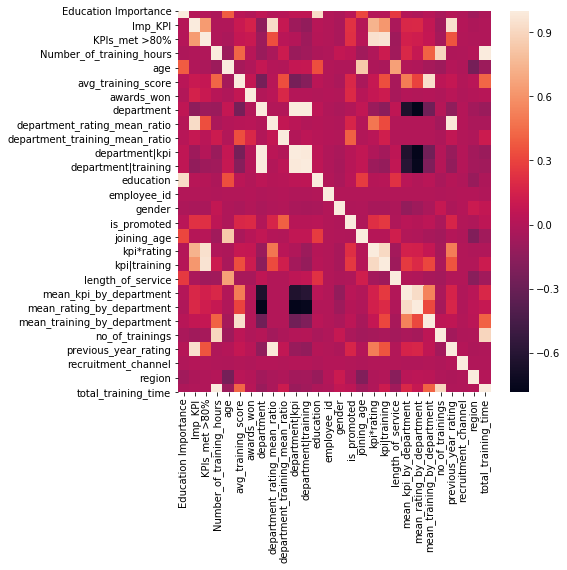

In [341]:
import seaborn as sns
import pandas as pd

data = train

plt.figure(figsize=(7,7)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

sns.heatmap(data.corr())

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [345]:
X_coll = calculate_vif_(X_train)

dropping 'Imp_KPI' at index: 1
dropping 'KPIs_met >80%' at index: 1
dropping 'Number_of_training_hours' at index: 1
dropping 'age' at index: 1
dropping 'department' at index: 3
dropping 'avg_training_score' at index: 1
dropping 'department|kpi' at index: 4
dropping 'previous_year_rating' at index: 15
dropping 'mean_rating_by_department' at index: 12
dropping 'Education Importance' at index: 0
dropping 'mean_training_by_department' at index: 11
dropping 'department_training_mean_ratio' at index: 2
dropping 'no_of_trainings' at index: 10
dropping 'mean_kpi_by_department' at index: 9
dropping 'kpi|training' at index: 7
dropping 'joining_age' at index: 5
dropping 'department_rating_mean_ratio' at index: 1
Remaining variables:
Index(['awards_won', 'department|training', 'education', 'gender',
       'kpi*rating', 'length_of_service', 'recruitment_channel', 'region',
       'total_training_time'],
      dtype='object')


In [346]:
X_coll.columns.values

array(['awards_won', 'department|training', 'education', 'gender',
       'kpi*rating', 'length_of_service', 'recruitment_channel', 'region',
       'total_training_time'], dtype=object)